In [1]:
from src.utils.audio_utils import extract_features
import IPython.display as ipd
import librosa.display
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("..")

### Getting some data on sample song


In [2]:
audio_path = "../data/audio_wav/batch_1/top_tiktok_songs/Sia - Unstoppable.mp3"

In [3]:
x, sr = librosa.load(audio_path)
print(type(x), type(sr))

/var/folders/tb/y105kszd545989l_47j4cx3m0000gn/T/ipykernel_64724/3839235412.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  x, sr = librosa.load(audio_path)
/Users/omersideman/dev/technion/ai-project/venv/lib/python3.10/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: '../data/track_downloads/batch_1/top_tiktok_songs/Sia - Unstoppable.mp3'

In [ ]:
ipd.Audio(audio_path)

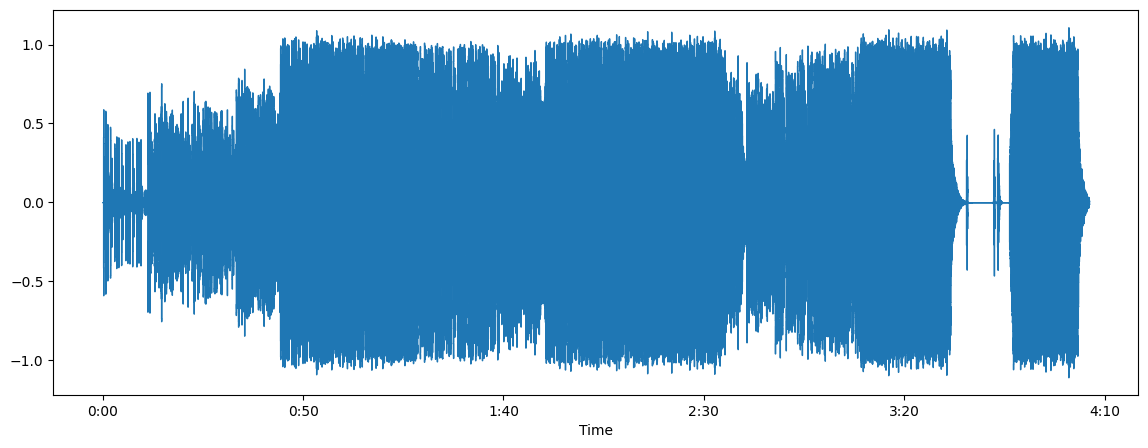

In [11]:
#display waveform
%matplotlib inline
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

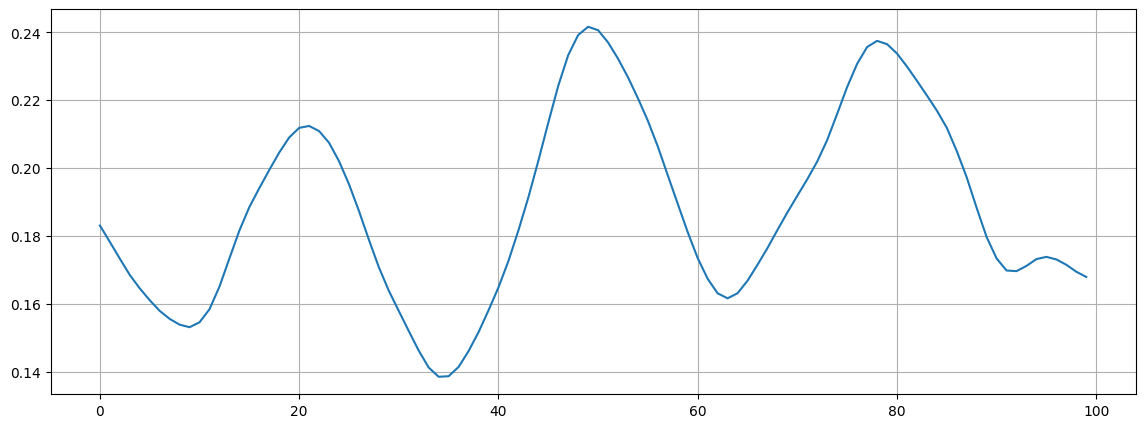

In [14]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

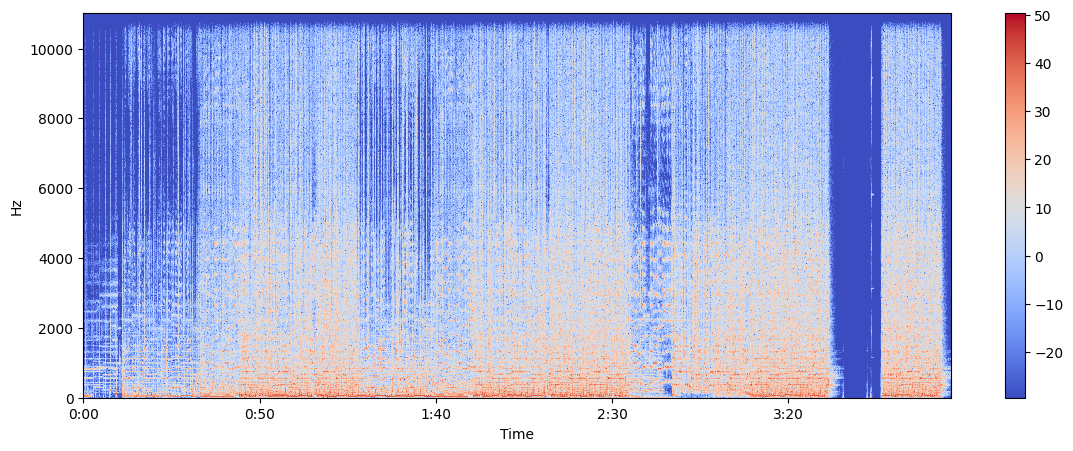

In [15]:
# display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis="time", y_axis="hz")
# If to pring log of frequencies
# librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

### Beginning feature extraction


#### Zero crossing rate

The zero crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to negative or back. This feature has been used heavily in both speech recognition and music information retrieval. It usually has higher values for highly percussive sounds like those in metal and rock.


In [17]:
zero_crossings = librosa.zero_crossings(x, pad=False)
print(sum(zero_crossings))

525904


#### Spectral centroid

It indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound. If the frequencies in music are same throughout then spectral centroid would be around a centre and if there are high frequencies at the end of sound then the centroid would be towards its end.


In [26]:
# spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
print(spectral_centroids.shape)
average_frequency = np.mean(spectral_centroids)
print(f"average frequency: {average_frequency}")

(10601,)
average frequency: 2199.595768890669


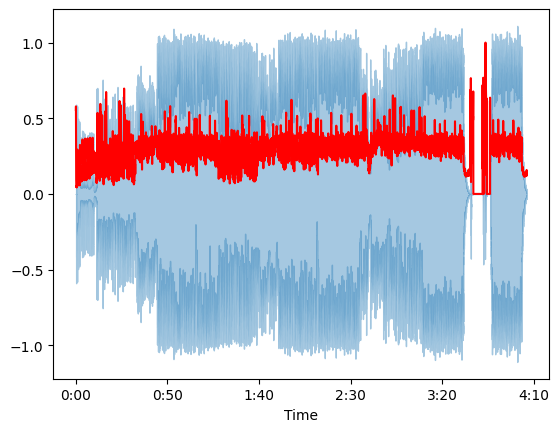

In [27]:
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)


def normalize(x, axis=0):
    # Normalising the spectral centroid for visualisation
    return sklearn.preprocessing.minmax_scale(x, axis=axis)  # type: ignore


# Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

#### Spectral rolloff

Spectral rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.


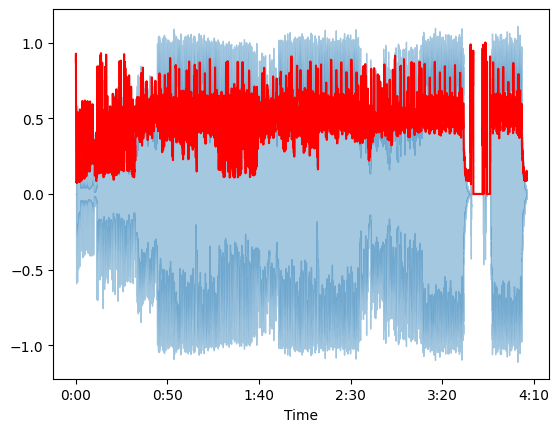

In [30]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr)[0]
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color="r")

In [31]:
average_spectral_rolloff = np.mean(spectral_rolloff)
print(f"average spectral rolloff: {average_spectral_rolloff}")

average spectral rolloff: 4534.959406007541


#### MFCC — Mel-Frequency Cepstral Coefficients

This feature is one of the most important method to extract a feature of an audio signal and is used majorly whenever working on audio signals. The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope.


(20, 10601)


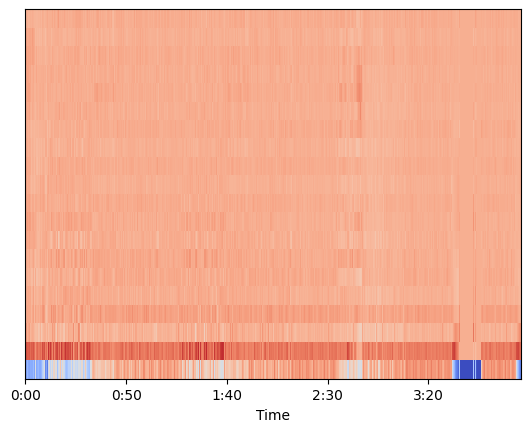

In [33]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)
# Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

#### Now all together


In [3]:
means = extract_features(audio_path)
print(means)

(12, 1292)
(1, 1292)
(1, 1292)
(1, 1292)
(1, 1292)
(1, 1292)
(20, 1292)
[0.35786262, 0.10565044, 1578.2268017891854, 1861.8451660180892, 3152.139272778396, 0.06460845285893962, -1.8848777]
